### Импорт библиотек


In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import pytest
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Создаем датасеты с качественными данными

In [41]:
np.random.seed(54)

# Датасет 1
X1 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y1 = (1 * X1 + var).reshape(-1, 1)

# Датасет 2
X2 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y2 = 1 * X2 + var

# Датасет 3
X3 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y3 = 1 * X3 + var

Визализация между входным признаком Х и целевой переменной Y

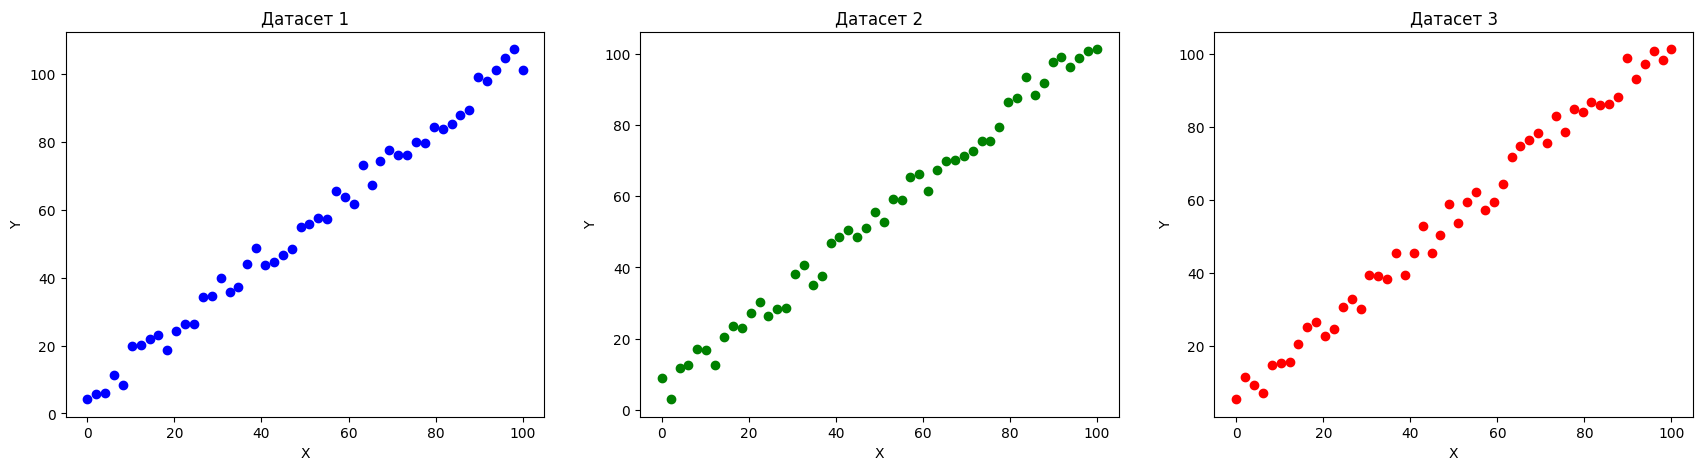

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

# Датасет 1
ax1.scatter(X1, Y1, color='b')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Датасет 1')

# Датасет 2
ax2.scatter(X2, Y2, color='g')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Датасет 2')

# Датасет 3
ax3.scatter(X3, Y3, color='r')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Датасет 3')

plt.show()

### Модель линейной регрессии

In [43]:
# Приводим признаки из одномерного массива к двумерному
X1, X2, X3 = X1.reshape(-1, 1), X2.reshape(-1, 1), X3.reshape(-1, 1)

In [44]:
# Обучение модели на наборе данных 1
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Добавим шум

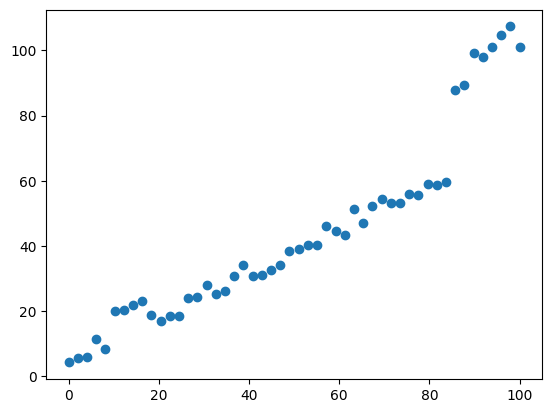

In [45]:
# Добавим шум в набор 1
Y1[10:42] *= 0.7
plt.scatter(X1, Y1)

### Оценка метрик


In [46]:
# Тестирование модели на качественных данных
Y2_predict = model.predict(X2)
Y3_predict = model.predict(X3)
# Тестирование модели на зашумленных данных
Y1_predict = model.predict(X1)

In [47]:
# Посчитаем метрику r2
ds2_r2 = r2_score(Y2, Y2_predict)
ds3_r2 = r2_score(Y3, Y3_predict)
corr_ds1_r2 = r2_score(Y1, Y1_predict)
print(f"r2 на качественном наборе данных {ds2_r2}")
print(f"r2 на качественном наборе данных {ds3_r2}")
print(f"r2 на зашумленном наборе данных {corr_ds1_r2}")

r2 на качественном наборе данных 0.9899968428734279
r2 на качественном наборе данных 0.9880687413417929
r2 на испорченном наборе данных 0.7288316486997843


Видим, что на зашумленных данных метрика r2 значительно снижается (до 0.72) против 0.98 на качественных данных.

### Сохранение файла для запуска тестов

In [48]:
%%writefile sample_data/lab5.py
# Импорт библитотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pytest
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Создаем датасеты с качественными данными
np.random.seed(54)

# Датасет 1
X1 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y1 = (1 * X1 + var).reshape(-1, 1)

# Датасет 2
X2 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y2 = 1 * X2 + var

# Датасет 3
X3 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y3 = 1 * X3 + var

# Приводим признаки из одномерного массива к двумерному
X1, X2, X3 = X1.reshape(-1, 1), X2.reshape(-1, 1), X3.reshape(-1, 1)

# Обучение модели на наборе данных 1
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Добавим шум в набор 1
Y1[10:42] *= 0.7

# Тестирование модели на качественных данных
Y2_predict = model.predict(X2)
Y3_predict = model.predict(X3)
# Тестирование модели на зашумленных данных
Y1_predict = model.predict(X1)

# Анализ с помощью Pytest
def test_predictions_corr_ds1():
   assert r2_score(Y1, Y1_predict) > 0.9, "Тест не пройден. Проблемы в датасете 1"

def test_predictions_ds2():
    assert r2_score(Y2, Y2_predict) > 0.9, "Тест не пройден. Проблемы в датасете 2"

def test_predictions_ds3():
    assert r2_score(Y3, Y3_predict) > 0.9, "Тест не пройден. Проблемы в датасете 3"

Writing sample_data/lab5.py


### Запуск тестов

In [49]:
!pytest -v sample_data/lab5.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 3 items                                                                                  

sample_data/lab5.py::test_predictions_corr_ds1 FAILED                                        [ 33%]
sample_data/lab5.py::test_predictions_ds2 PASSED                                             [ 66%]
sample_data/lab5.py::test_predictions_ds3 PASSED                                             [100%]

============================================= FAILURES =============================================
____________________________________ test_predictions_corr_ds1 _____________________________________

    def test_predictions_corr_ds1():
>      assert r2_score(Y1, Y1_predict) > 0.9, "Тест не пройден. Проблемы в датасете 1"
E      AssertionError: Тес

Видим, что тест не прошла модель с датасетом 1.

Этого стоило ожидать, так как именно в этот датасет мы добавили шум в данные.